# IRIS  CLASSIFICATION

In [1]:
#Importing libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Dataset
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
#Checking for null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data visualization (Species)

In [7]:
import matplotlib.pyplot as plt

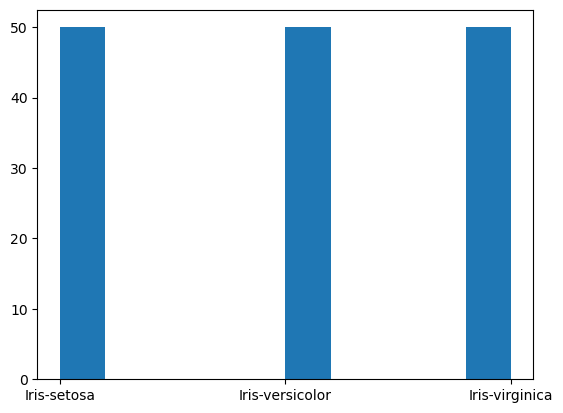

In [8]:
plt.hist(df['Species'])
plt.show()

In [9]:
x=df.iloc[:,1:5]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)


In [11]:
print('shape of x_train =',x_train.shape)
print('shape of y_train =',y_train.shape)
print('shape of x_test =',x_test.shape)
print('shape of y_test =',y_test.shape)

shape of x_train = (120, 4)
shape of y_train = (120,)
shape of x_test = (30, 4)
shape of y_test = (30,)


In [12]:
from sklearn.metrics import accuracy_score

# Model selection

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)
lg_accuracy = accuracy_score(lg_pred, y_test)

lg_accuracy

0.9333333333333333

In [15]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svm_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(svm_pred, y_test)

svc_accuracy

1.0

In [16]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
sgd_accuracy = accuracy_score(sgd_pred, y_test)

sgd_accuracy

1.0

In [17]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(decision_tree_pred, y_test)

decision_tree_accuracy

0.9333333333333333

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_accuracy=accuracy_score(rf_pred,y_test)
rf_accuracy


0.9

# Compairing different models

In [19]:
models=pd.DataFrame({'Models':['logistic','svc','sgd','tree','forest'],
                    'Accuracy':[lg_accuracy,svc_accuracy,sgd_accuracy,decision_tree_accuracy,rf_accuracy]})

In [20]:
models.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy
1,svc,1.000000
2,sgd,1.000000
0,logistic,0.933333
3,tree,0.933333
4,forest,0.900000


# Prediction on new data

In [21]:
new=np.array([[5.1 ,3.5 ,1.4 ,0.2]])

In [22]:
#As svc is giving highest accuracy we will predict using svc
prediction=svc.predict(new)
prediction

array(['Iris-setosa'], dtype=object)